In [27]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer

#### 비지도 학습의 종류

##### 비지도 변환
- 데이터를 새롭게 표현하여 사람이나 다른 머신러닝 알고리즘이 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘.
- 주로 사용되는 분야는 차원 축소
- 데이터를 구성하는 단위나 성분을 찾음. 텍스트 문서에서의 주제 추출

##### 군집
- 비슷한 것끼리 그룹으로 묶는 것


##### 비지도 학습의 도전 과제
- 보통 레이블이 없는 데이터를 대상으로 이뤄지기 떄문에 학습에 대한 평가가 쉽지 않다.
- 결과를 평가하기 위해서는 직접 확인하는 것이 유일한 방법일 때가 많다.
- 위와 같은 이유로 데이터를 더 잘 이해하고 싶을 때 탐색적 데이터 분석 단계에서 많이 사용
- 스케일 조정 메서드는 지도 정보를 사용하지 않으므로 비지도 방식에 해당

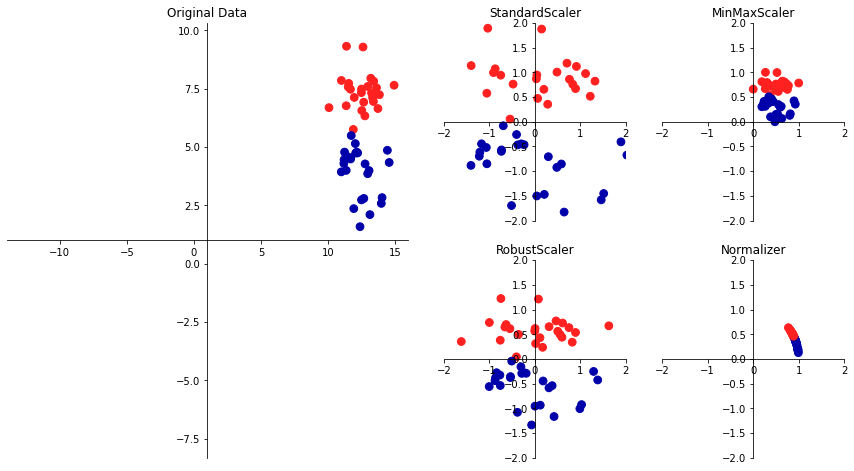

In [3]:
mglearn.plots.plot_scaling()

- StandardScaler는 각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 갖게 한다
- 하지만 최소,최대값 크기를 제한하지는 않는다.
  #
- RobustScaler는 특성들이 같은 스케일을 갖는다는 면에서 StandardScaler와 유사
- 하지만 평균과 분산 대신 중간값과 사분위 값을 사용하기 때문에 이상치에 영향을 받지 않는다.
  #
- MinMaxScaler는 모든 특성이 정확하게 0과 1사이에 위치하도록 데이터를 변환
  #
- Normalizer는 매우 다른 스케일 조정기법
- 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트 조정
- 다른 말로 지름이 1인 원에 데이터 포인트를 투영하는데 각 데이터 포인트가 다른 비율로 스케일이 조정된다는 뜻
- 이 방식은 특성 벡터의 길이는 상관 없고 데이터의 방향만이 중요할 때 많이 사용

In [5]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [7]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [9]:
X_train_scaled = scaler.transform(X_train)

print('변환 후 크기:', X_train_scaled.shape)
print('스케일 조정 전 특성별 최소값:\n', X_train.min(axis=0))
print('스케일 조정 전 특성별 최대값:\n', X_train.max(axis=0))
print('스케일 조정 후 특성별 최소값:\n', X_train_scaled.min(axis=0))
print('스케일 조정 후 특성별 최대값:\n', X_train_scaled.max(axis=0))

변환 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [7.691e+00 9.710e+00 4.792e+01 1.704e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.167e-01 4.996e-02 1.115e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 8.678e+00
 1.202e+01 5.449e+01 2.236e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.184e-01 9.379e-01 9.608e-01 2.910e-01
 6.638e-01 1.730e-01]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [11]:
X_test_scaled = scaler.transform(X_test)

print('스케일 조정 후 특성별 최소값:\n', X_test_scaled.min(axis=0))
print('스케일 조정 후 특성별 최대값:\n', X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값:
 [-0.03477154  0.0226581  -0.02937829 -0.01154209  0.1185339   0.05547565
  0.          0.         -0.0571276   0.05686605  0.00184682  0.00057461
  0.00067851  0.00402131  0.04949519  0.02556554  0.          0.
  0.03092687  0.01120048 -0.02733718  0.01252665 -0.02074119 -0.00952759
  0.11424302  0.03036426  0.          0.          0.00019712  0.03399457]
스케일 조정 후 특성별 최대값:
 [0.85846516 0.72404464 0.87907241 0.73268686 0.76257109 1.11643038
 0.87956888 0.91699801 0.92845702 0.68386689 0.42712294 0.7814268
 0.41831975 0.36028898 0.48703131 0.78219725 0.76717172 0.62928585
 1.32643996 0.75885466 0.87025802 0.93656716 0.81088913 0.79605002
 1.02852679 1.13188961 1.30308077 0.9975945  0.76384782 1.29247202]


- 모든 스케일 모델은 항상 훈련 세트와 테스트 세트에 같은 변환을 적용해야 한다.
- transform 메서드는 테스트 세트의 최솟값과 범위를 사용하지 않으며 항상 훈련 세트의 최솟값을 빼고 범위로 나눈다.

- QuantileTrransformer는 기본적으로 1000개의 분위를 사용하여 데이터를 균등하게 분포시킨다.
- RobustScaler와 비슷하게 이상치에 민감하지 않으며 전체 데이터를 0과 1사이로 압축시킨다.

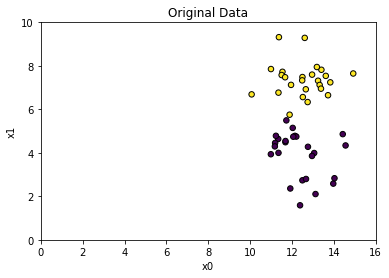

In [16]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 16)
plt.xlabel('x0')
plt.ylim(0, 10)
plt.ylabel('x1')
plt.title('Original Data')
plt.show()

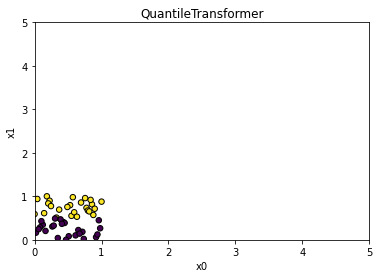

In [19]:
scaler = QuantileTransformer(n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.xlabel('x0')
plt.ylim(0, 5)
plt.ylabel('x1')
plt.title('QuantileTransformer')
plt.show()

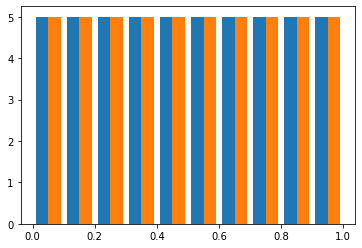

In [20]:
plt.hist(X_trans)
plt.show()

In [21]:
# scaler 객체의 quantiles_ 속성에는 특성별로 계산된 분위 값이 들어 있으므로 속성의 크기는 (n_quantiles, n_features)

print(scaler.quantiles_.shape)

(50, 2)


In [22]:
x = np.array([[0], [5], [8], [9], [10]])
print(np.percentile(x[:, 0], [0, 25, 50 ,75, 100]))

[ 0.  5.  8.  9. 10.]


In [23]:
x_trans = QuantileTransformer(n_quantiles=5).fit_transform(x)
print(np.percentile(x_trans[:, 0], [0, 25, 50, 75, 100]))

[0.   0.25 0.5  0.75 1.  ]


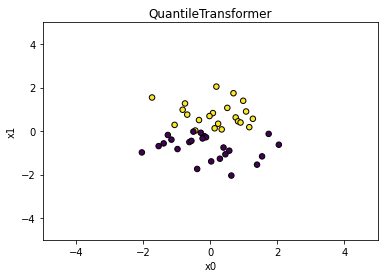

In [24]:
scaler = QuantileTransformer(output_distribution='normal', n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(-5, 5)
plt.xlabel('x0')
plt.ylim(-5, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

- output_distribution에서 매개변수를 normal로 지정하여 균등 분포가 아니라 정규분포로 출력을 바꿀 수 있다.

- PowerTransformer 데이터의 특성별로 정규분포 형태에 가깝도록 변환
- method 매개변수에 'yeo-johnson'와 'box-cox'알고리즘 지정 가능. 기본값은 'yeo-johnson'

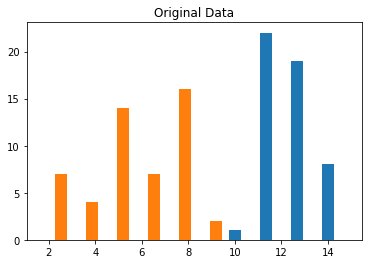

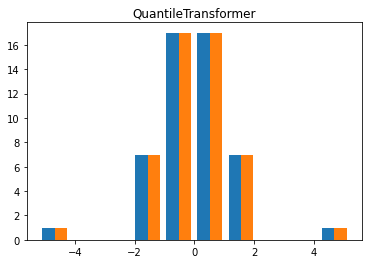

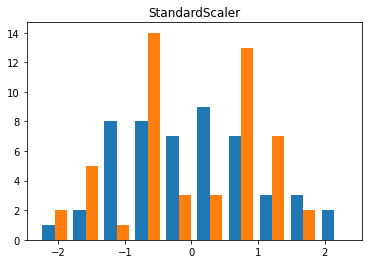

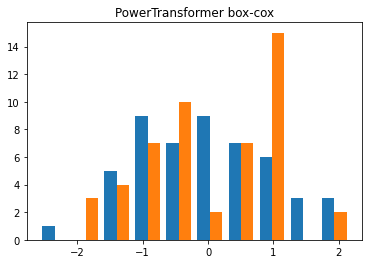

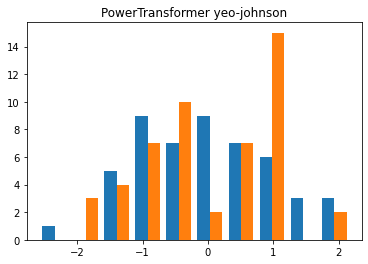

In [25]:
plt.hist(X)
plt.title("Original Data")
plt.show()

X_trans = QuantileTransformer(output_distribution='normal', n_quantiles=50).fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()

-실전에서는 데이터셋마다 어떤 변환이 정규분포에 가깝게 변환할지 사전에 알기 어렵기 때문에 각 결과를 히스토그램으로 확인해보는 것이 좋다.

c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\minicon

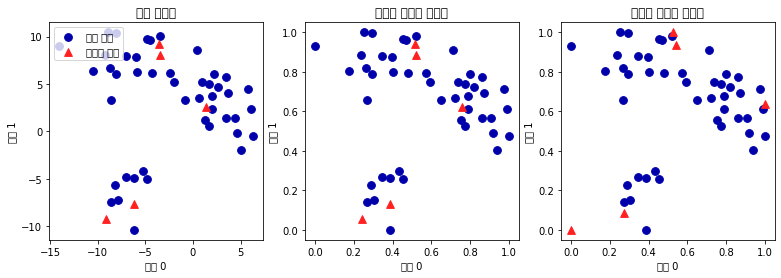

In [26]:
X, _ = make_blobs(n_samples=50, centers=5, random_state=42, cluster_std=2)

X_train, X_test = train_test_split(X, random_state=42, test_size=.1)

fig, axes = plt.subplots(1, 3, figsize=(13, 4))

axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2.colors[0], label='훈련 세트', s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c=mglearn.cm2.colors[1], label='테스트 세트', s=60)
axes[0].legend(loc='upper left')
axes[0].set_title('원본 데이터')

# MinMaxScaler를 사용해 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2.colors[0], label='훈련 세트', s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c=mglearn.cm2.colors[1], label='테스트 세트', s=60)
axes[1].set_title('스케일 조정된 데이터')

# 스케일을 잘못 조정하는 경우
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2.colors[0], label='훈련 세트', s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', c=mglearn.cm2.colors[1], label='테스트 세트', s=60)
axes[2].set_title('스케일 조정된 데이터')

for ax in axes:
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')

- 원본 데이터의 첫 번째 그래프와 MinMaxScaler의 두 번째 그래프는 축의 눈금을 제외하고 동일
- 세 번째 그래프는 훈련 세트와 테스트 세트의 스케일을 서로 다른 방식으로 조정했을 때의 예시
- 테스트 데이터의 스케일이 다르게 조정되어 데이터가 잘못 변환되었다.
- 다른 예시로는 테스트 세트가 하나뿐일 경우 MinMaxScaler에 필요한 최소, 최대값이 없어 조정이 불가능하다.
- 하지만 테스트 세트의 크기 때문에 스케일 과정이 달라져서는 안된다.
- 위와 같은 이유로 훈련, 테스트 세트의 스케일 조정은 같은 방식으로 이루어져야 한다.

In [40]:
# 스케일 조정을 하지 않은 경우

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print('테스트 세트 정확도 : {:.2f}'.format(svm.score(X_test, y_test)))

테스트 세트 정확도 : 0.94


In [41]:
# MinMaxScaler 사용하는 경우

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print('테스트 세트 정확도 : {:.2f}'.format(svm.score(X_test_scaled, y_test)))

테스트 세트 정확도 : 0.97


In [42]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print('테스트 세트 정확도 : {:.2f}'.format(svm.score(X_test_scaled, y_test)))

테스트 세트 정확도 : 0.96
